# Adaline Network dan Delta Rule

* ADALINE = Adaptive Linear Element
* Dibuat oleh Widrow dan Hoff tahun 1960 untuk rangkaian switch pada jaringan telepon
* Merupakan aplikasi pertama neural network yang efektiv pada industri
* Terdiri dari satu layer yang terdiri dari 1 neuron
* Sebagaimana perceptron, merupakan pengklasifikasi biner ( 2 kelas berbeda)
* Metode Pembelajaran: Delta Rule

\begin{figure}[h!]
\notag
\centering
\includegraphics{gambar/perceptron_vs_adaline.png}
\caption{Perceptron dan Adaline}
\end{figure}

Perbedaan dengan perceptron:

* output pada perceptron adalah kelas label target ( output dari fungsi step yang menjadi fungsi aktivasi) sedangkan pada adaline adalah bilangan real
* Update bobot dengan menghitung keseluruhan sampel input pada data training)


Penghitungan output y adalah sebagai berikut:

$$
\notag
\begin{aligned}
u &= \sum_{i=1}^nw_i\cdot x_i-\theta \\
y &= g(u)
\end{aligned}
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_i$ adalah sinyal input dari ADALINE, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_i$ adalah bobot sinapsis terkait dengan input ke $i$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\theta$ adalah threshold aktivasi atau bias<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$g(.)$ adalah fungsi aktivasi<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;u adalah potensial aktivasi

### Delta Rule
**Delta Rule atau Widrow-Hoff Rule juga dikenal sebagai algoritma LMS (Least Mean Square) atau metode Gradient Descent**
___
** Prinsip algoritma:**

* meminimalisir difference target dan output
* memperhatikan seluruh sampel input p untuk memperbaiki nilai bobot dan bias dari neuron dengan menghitung mean squared error (MSE) antara target (d) dengan output (u)        
* disebut cost function(fungsi biaya)
$$
\\
\bar{E}(w) = \frac{1}{p}\sum_{k=1}^{p}\big(d^{(k)}-u\big)^2\\
$$


* Algoritma berkonvergensi jika selisih mean squared error dari dua epoch berturutan cukup kecil: 
$$
\\
|\bar{E}(w^{sekarang}) - \bar{E}(w^{sebelumnya}) \leq \varepsilon
\\
$$
di mana $\varepsilon$ adalah konstanta pembatas
* Update bobot dan bias pada adaline network:
$$
\\
\\
\begin{aligned}
\mathbf{w} \gets \mathbf{w} + \eta \cdot (d^{(k)}-u) \cdot \mathbf{x}^{(k)}, \text{dengan } k = 1 \dots p \\
\end{aligned}
\\
$$
$\mathbf{w} = \begin{bmatrix}
       {\theta}&w_1 & w_2 & \dots w_n \end{bmatrix}^T$ adalah vektor berisi bias dan bobot 
$\mathbf{x}^{(k)} = \begin{bmatrix}
       {-1} &x_1^{(k)} & x_2^{(k)} & \dots x_n^{(k)} \end{bmatrix}^T$ adalah vektor input dengan sampel sebanyak k       
$d^{(k)}$ adalah target output yang diharapkan<br>
$u$ adalah output yang dihasilkan Adaline elemen<br>
$\eta$ adalah **learning rate**, yaitu konstanta untuk menentukan seberapa cepat proses training menuju kestabilan. Biasanya $\eta$ didefinisikan dalam nilai $0 < \eta < 1$

![Interpretasi Geometrik dari delta rule](gambar/deltarule1.png)

### Algoritma Fase Training Delta Rule
![training](gambar/alg_train_adaline.png)

### Algoritma fungsi untuk menghitung MSE
![](gambar/alg_mse_adaline.png)

### Algoritma Untuk prediksi/klasifikasi
![](gambar/alg_prediksi_adaline.png)

### Ilustrasi training proses pada adaline
![](gambar/trainprosesadaline.png)

### MSE vs Epoch pada Delta Rule
* MSE semakin kecil dengan bertambahnya epoch
* Jika sampai pada poin minimum, MSE menjadi konstan
![](gambar/mse_epoch.png)

### Perbandingan Perceptron dengan Adaline
![](gambar/perceptronadaline1.png)

Perceptron vs Adaline pada data dengan noise
![](gambar/perceptronadaline2.png)

### Implementasi Adaline dalam python
___


In [19]:
import numpy as np

class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        '''
        Inisialisasi learning rate (eta), epoch, dan bobot awal
        '''
        self.eta = eta 
        self.epochs = epochs
        self.w_ = np.zeros(1 + X.shape[1])
        # Bobot awal = vektor dengan isi nol
        # X.shape[1] berarti banyaknya input x1 sd xn
        # ditambahkan satu item di depan untuk bias

    def train(self, X, y):
        self.cost_ = []  # Deklarasi array untuk menyimpan nilai fungsi biaya
        print(self.w_) #sekedar untuk mengetahui bobot awal

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 100.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) - self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [20]:
import pandas as pd

df = pd.read_csv('iris.data', header=None)
print(df[:10])
# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print(y[:10])
# sepal length and petal length
X = df.iloc[0:100, [0,2]].values
print(X[:10])

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]


## Eksekusi Program dengan Learning Rate Berbeda
___
1. Dengan Learning Rate 0,01

[0. 0. 0.]


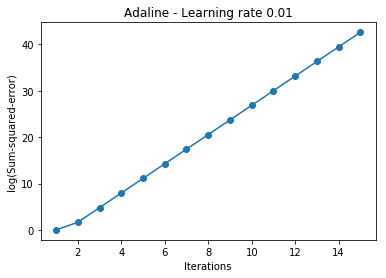

In [21]:
import matplotlib.pyplot as plt

ada = AdalineGD(epochs=15, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

2. Dengan Learning Rate 0.0001

[0. 0. 0.]


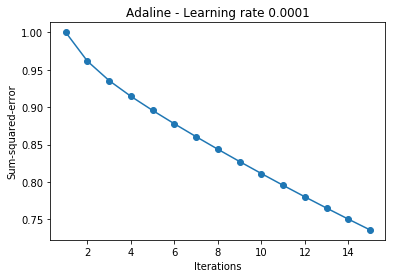

In [22]:
ada = AdalineGD(epochs=15, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

###  Kesimpulan: Pengaruh Learning Rate pada gradient descent
___
* Learning Rate menentukan kecepatan mencapai konvergensi 
* Jika Learning rate terlalu besar, gradient descent bisa melewati minima, dan justru bisa mengalami divergensi (gagal mendapatkan error terendah)
* Jika Learning Rate terlalu kecil, algoritma akan lambat mencapai konvergen
    - bahkan ada kemungkinan terjebak pada minima lokal

**Pengaruh Learning Rate**
___

\begin{figure}[h!]
\centering
\includegraphics{gambar/learning_rate.png}
\caption{Pengaruh Learning Rate}
\end{figure}

### Standarisasi / Normalisasi
___
* Perlu untuk menyamakan skala data pada algoritma machine learning
    - memudahkan menentukan learning rate yang sesuai
    - mempercepat konvergensi
    - mencegah bobot menjadi terlalu kecil
    

Salah satu metode normalisasi yang umum digunakan:

$$
\\
\mathbf{x}_{j,dinormalisasi}=\frac{\mathbf{x}_j-\mu_j}{\sigma_j}
\\
$$

di mana $\mu_j$ adalah rata-rata (mean) dari fitur $\mathbf{x}_j$, dan
$\sigma_j$ adalah standard deviasi dari fitur $\mathbf{x}_j$


In [23]:
# Normalisasi Iris Data di atas
X_norm = np.copy(X) # membuat copy baru untuk array input X

#Normalisasi untuk x1 => ingat, array mulai index 0 !!
X_norm[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()

#Normalisasi untuk x2
X_norm[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

print(X_norm[:10])

[[-0.5810659  -1.01435952]
 [-0.89430898 -1.01435952]
 [-1.20755205 -1.08374115]
 [-1.36417359 -0.94497788]
 [-0.73768744 -1.01435952]
 [-0.11120129 -0.80621461]
 [-1.36417359 -1.01435952]
 [-0.73768744 -0.94497788]
 [-1.67741667 -1.01435952]
 [-0.89430898 -0.94497788]]


[0. 0. 0.]


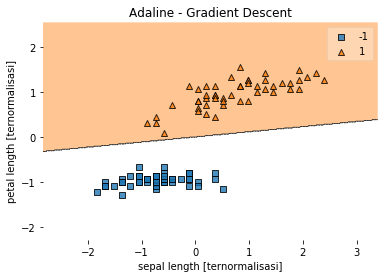

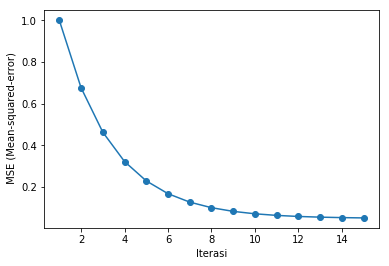

In [24]:
#ADALINE yang sama diterapkan pada data yang dinormalisasi

%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ada = AdalineGD(epochs=15, eta=0.01)

ada.train(X_norm, y)
plot_decision_regions(X_norm, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [ternormalisasi]')
plt.ylabel('petal length [ternormalisasi]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterasi')
plt.ylabel(' MSE (Mean-squared-error)')
plt.show()


**Pergerakan gradient terhadap epochs pada adaline**
___

\begin{figure}[h!]
\centering
\includegraphics{gambar/adaline_animation.gif}
\caption{Pergerakan gradient untuk klasifikasi Data Iris}
\end{figure}

## Tugas: Ubah adaline di atas, dengan pembatasan berdasarkan konstanta $\varepsilon$